# Chapter 3: 数学編

## 紹介するモジュール
1. [math](https://docs.python.jp/3/library/math.html)
2. [numpy](http://www.numpy.org/)
3. [scipy](https://docs.scipy.org/doc/)

## モジュールの利用
モジュールを利用する場合，以下のように書く．
```python
import module # moduleの利用
module.function() # module内にある関数functionを使う
```

毎回`module`と書くことはプログラムを長くする可能性があり不便だ．
そのため，以下のような書き方もできる．
```python
from module import function # module内の関数functionのみを読み込む
function()
```
この書き方の場合，`module`内の関数functionのみを読み込んでいるため，`module`内の他の関数を利用することはできない．

また，モジュール名や関数名を置き換えるときに，`as`という予約語を用いる．
例えば，次のように書くことできる
```python
import numpy as np # numpyというモジュールをnpと表す
print(np.e) 
```

## 3-1. math 
mathモジュールは，Pythonの標準ライブラリに含まれている．

mathモジュールには，例えば次のような関数がある．
- `math.sqrt`: 平方根
- `math.exp`: 指数関数
- `math.sin`: sin関数

In [3]:
import math
print(math.sqrt(2))
print(math.exp(2))
print(math.sin(2))

1.4142135623730951
7.38905609893065
0.9092974268256817


他にも次のような定数も利用できる．
- `math.pi`
- `math.e`

In [4]:
print(math.pi, math.e)

3.141592653589793 2.718281828459045


## 3-2. Numpy

### 特徴
- Pythonで数学を扱う場合，必ずといっていいほど利用されるモジュール．
- 行列演算をサポート
- 通常のPythonを使うよりも数倍の速度で演算できる

### よく利用されるメソッド

#### numpy配列
Pythonのデータ構造にあるリストとは別に，numpyを利用した配列がある．

1次元のときはベクトル，2次元では行列，3次元以上はテンソルに対応する．

In [23]:
import numpy as np
vec = np.array([[1, 2]]) # 1次元の配列をNumpy配列(ベクトル)にする
matrix = np.array([[1, 3], [6, 4]]) # 2次元の配列をNumpy配列(行列)にする
print(vec)
print(matrix)

[[1 2]]
[[1 3]
 [6 4]]


すべての要素が1や0になる特殊なメソッドがある．

In [24]:
print(np.ones(3)) # 3次元の1ベクトル
print(np.zeros(3)) # 3次元の0ベクトル
print(np.ones((2, 3))) #2x3次元の1行列
print(np.zeros((2, 3))) #2x3次元の0行列

[ 1.  1.  1.]
[ 0.  0.  0.]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [25]:
print("dtype", matrix.dtype) # 型を表示する
print("shape", matrix.shape) # サイズ(次元)

dtype int64
shape (2, 2)


#### 行列の要素積や行列積の計算
注意点
- np.arrayとnp.matrixでは挙動が異なる
    - np.arrayでは`*` で要素積になるが，np.matrixでは行列積になる

In [30]:
A = np.array([[1, 3], [6, 4]])
print("*演算:\n", A*A) # 行列Aどうしの要素積
print("np.dot:\n", np.dot(A, A)) # 行列Aどうしの行列積

B = np.matrix([[1, 3], [6, 4]])
print("*演算:\n", B*B) # 行列Bどうしの行列積
print("np.dot:\n", np.dot(B, B)) # 行列Bどうしの行列積

*演算:
 [[ 1  9]
 [36 16]]
np.dot:
 [[19 15]
 [30 34]]
*演算:
 [[19 15]
 [30 34]]
np.dot:
 [[19 15]
 [30 34]]


### よく使うサブモジュール，関数

- `np.linalg`: 線形代数モジュール  
    - `np.linalg.inv`: 逆行列を求める関数
    - `np.linalg.eig`: 固有値，固有ベクトルを求める関数
    
- `np.random`: 乱数モジュール

## 3-3. Scipy
ScipyモジュールはNumpyの拡張モジュールであり，よく利用されるモジュール．  
科学技術に関わる計算アルゴリズムの多くが実装されているので，自作するよりもここを調べるといい．

### 特徴
- Numpyよりも高度な数学関数が用意されている．
- 最適化や高速フーリエ変換なども扱う

### よく使うサブモジュール
- `scipy.linalg`: 線形代数
- `scipy.optimize`: 最適化
- `scipy.sparse`: 疎行列に対する処理
- `scipy.stats`: 統計処理

### 例題 2-3-1. 最適化

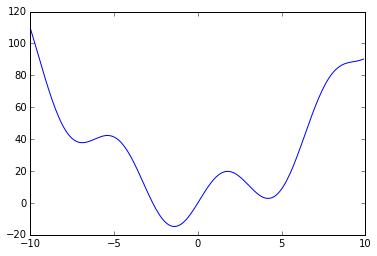

In [32]:
from scipy.optimize import fmin_bfgs
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x ** 2 + 17 * np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [39]:
x_star = fmin_bfgs(f, 0) # 関数f(x)の最適化(最小値をとるxを求める)

Optimization terminated successfully.
         Current function value: -14.792859
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7


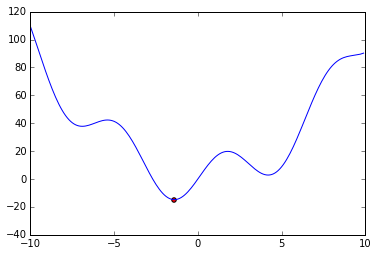

In [40]:
plt.xlim(-10, 10)
plt.plot(x, f(x))
plt.scatter(x_star, f(x_star), c='red');

## [練習問題](./../exercise/question3.md)